<a href="https://colab.research.google.com/github/AsafKaslassy/FashionMnist_CNN/blob/master/Cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial No. 2

## 1. Import Packages

In [0]:
#from keras.datasets import fashion_mnist
from keras.datasets import cifar10

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# from plot_confusion_matrix import plot_confusion_matrix
import numpy as np

# Deal with Over-Fitting
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Augmentaion
from keras.preprocessing.image import ImageDataGenerator


## 2. Load Data

In [118]:
#(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# Remove images to get smaller dataset
x_train = x_train[:1000,:,:]
y_train = y_train[:1000]
x_test = x_test[:500,:,:]
y_test = y_test[:500]

# Change the shape to (n_clss)x(Height)x(Weight)x(channels)
#x_train = np.expand_dims(x_train, axis=3)
#x_test =  np.expand_dims(x_test, axis=3)

# Change labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Print shapes
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)


x_train shape: (1000, 32, 32, 3)
x_test shape: (500, 32, 32, 3)
y_train shape: (1000, 10)
y_test shape: (500, 10)


## 3. Define Parameters 

In [0]:
num_of_clss = 10           # number of classes
lr =          1e-7         # learning rate 
beta_1 =      0.9          # beta 1 - for adam optimizer
beta_2 =      0.95         # beta 2 - for adam optimizer
epsilon =     1e-6         # epsilon - for adam optimizer
epochs =      80           # number of epochs 
bs =          128           # batch size
dp =          0.01          # dropout probability

# steps_per_epoch = len((x_train)/bs)*2
steps_per_epoch = 10

## 4. Build CNN Model

In [0]:
inp = Input(shape = (x_train.shape[1],x_train.shape[2],x_train.shape[3]))

# First conv block
x = Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation = 'relu')(inp)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

# Second conv block
x = Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation = 'relu')(x)
# x = Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(dp)(x)

# Third conv block
x = Conv2D(16, (3, 3), strides=(1, 1), padding='same', activation = 'relu')(x)
# x = Conv2D(16, (3, 3), strides=(1, 1), padding='same', activation = 'relu')(x)
# x = Conv2D(16, (3, 3), strides=(1, 1), padding='same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

# FC layers
x = Flatten()(x)
x = Dense(15, activation = 'sigmoid')(x)
x = BatchNormalization()(x)
x = Dropout(dp)(x)
out = Dense(num_of_clss, activation = 'softmax')(x)

model = Model(inp,out)


## 5. Apply Augmentation

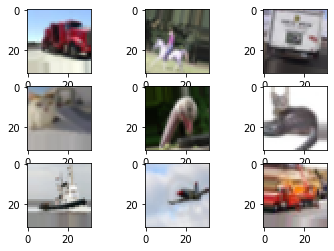

In [121]:
# Define wanted augmentation
datagen = ImageDataGenerator(
    validation_split=0.3,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

# Fit on our train set
datagen.fit(x_train)

# Visualize the augmentation
# configure batch size and retrieve one batch of images
# for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
#     # create a grid of 3x3 images
#     for i in range(0, 9):
#         plt.subplot(330 + 1 + i)
#         plt.imshow(x_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
#     # show the plot
#     plt.show()
#     break

for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        #plt.imshow(x_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
        plt.imshow(x_batch[i].astype('uint8')) #.shape
    # show the plot
    plt.show()
    break


##  6. Compile the Model

In [0]:
# define the optimizer and compile the model
adam = optimizers.Adam(lr=lr, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# add early stopping
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')


## 7. Train the Model

In [123]:
# fits the model on batches with real-time data augmentation:
train_generator = datagen.flow(x_train, y_train, batch_size=bs)
val_generator = datagen.flow(x_train, y_train, batch_size=bs, subset='validation')


# history = model.fit(x_train, y_train, batch_size=bs, epochs=epochs)


history = model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=epochs,
                              validation_data=val_generator,
                              validation_steps=steps_per_epoch)


Epoch 1/80
10/10 [==============================] - 8s 795ms/step - loss: 2.4122 - acc: 0.1640 - val_loss: 2.4646 - val_acc: 0.1187
Epoch 2/80
10/10 [==============================] - 5s 480ms/step - loss: 2.1339 - acc: 0.2118 - val_loss: 2.3632 - val_acc: 0.1274
Epoch 3/80
10/10 [==============================] - 5s 490ms/step - loss: 2.0424 - acc: 0.2508 - val_loss: 2.3125 - val_acc: 0.1595
Epoch 4/80
10/10 [==============================] - 5s 532ms/step - loss: 1.9577 - acc: 0.2747 - val_loss: 2.2880 - val_acc: 0.1722
Epoch 5/80
10/10 [==============================] - 5s 477ms/step - loss: 1.8586 - acc: 0.3368 - val_loss: 2.2634 - val_acc: 0.1946
Epoch 6/80
10/10 [==============================] - 5s 480ms/step - loss: 1.8684 - acc: 0.3193 - val_loss: 2.2221 - val_acc: 0.2490
Epoch 7/80
10/10 [==============================] - 5s 469ms/step - loss: 1.8094 - acc: 0.3393 - val_loss: 2.1640 - val_acc: 0.2422
Epoch 8/80
10/10 [==============================] - 5s 514ms/step - loss: 1.

## 8. Visualize

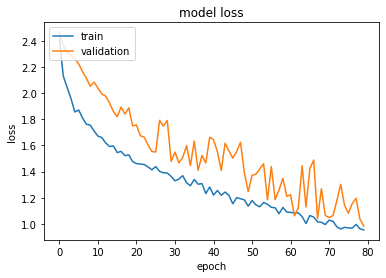

In [124]:
# plot train and validation loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show(); plt.close()


## 9. Model Evaluation

In [0]:
# import tensorflow
# y_pred = model.predict(tensorflow.cast(x_test, tensorflow.float32))
# test_loss, test_acc = model.evaluate(x_test, y_test)

# # Print results
# print('test loss:', test_loss)
# print('test accuracy:', test_acc)

# # Confusion Matrix
# cm = confusion_matrix(np.argmax(y_test,axis=1), np.argmax(np.round(y_pred),axis=1))
# labels = ['class ' + str(i) for i in range(num_of_clss)] 
# plot_confusion_matrix(cm,labels,title='Confusion Matrix',normalize=True)


In [0]:
# len((x_train)/512)